# <center> G2 Python Code </center>
---

### <center> Kang, Eui Hyeon </center>

### <center> 2021-02-24 </center>


## Data Preparation

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive
%cd 'My Drive'
%cd 'Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/Colab Notebooks


In [2]:
diamonds=pd.read_csv('./diamonds.csv')

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds=diamonds[(diamonds['color']=='G') & (diamonds['carat']<1.75)][['carat','cut','price']].reset_index(drop=True)

In [5]:
diamonds['cut'].unique()

array(['Very Good', 'Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [6]:
diamonds.head()

,carat,cut,price
0,0.23,Very Good,354
1,0.23,Ideal,404
2,0.28,Ideal,553
3,0.31,Very Good,553
4,0.31,Premium,553


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 864x720 with 0 Axes>

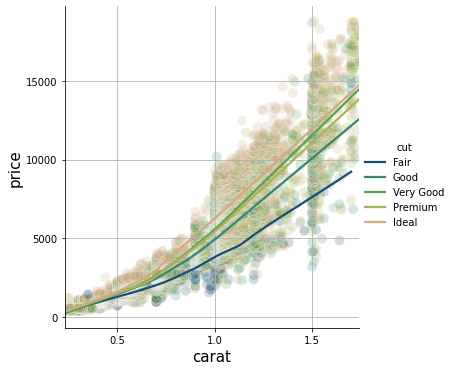

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,10))
sns.lmplot(data=diamonds, x='carat', y='price',
           hue='cut', hue_order=['Fair','Good','Very Good','Premium','Ideal'], 
           palette='gist_earth',lowess=True, scatter=False,legend=True)
sns.scatterplot(data=diamonds, x='carat', y='price', hue='cut', hue_order=['Fair','Good','Very Good','Premium','Ideal'],
               palette='gist_earth', s=100, alpha=0.2, legend= False)
plt.grid(True)
plt.xlabel('carat', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.xticks([0.5, 1.0, 1.5])
plt.yticks([0,5000,10000,15000])
plt.show()

In [8]:
diamonds=pd.get_dummies(diamonds)
diamonds=diamonds.rename(columns={'cut_Very Good':'cut_VeryGood'})
diamonds.head()

,carat,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_VeryGood
0,0.23,354,0,0,0,0,1
1,0.23,404,0,0,1,0,0
2,0.28,553,0,0,1,0,0
3,0.31,553,0,0,0,0,1
4,0.31,553,0,0,0,1,0


In [9]:
import statsmodels.api as sm

X=diamonds.drop(['price','cut_Ideal'], axis=1)
y=diamonds['price']

X=sm.add_constant(X)
lm_fit=sm.OLS(y,X).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        02:48:40   Log-Likelihood:                -94482.
No. Observations:               10969   AIC:                         1.890e+05
Df Residuals:                   10963   BIC:                         1.890e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2427.3831     29.684    -81.775      0.000   -2485.569   -2369.197
carat         8761.2999     33.288    263.196      0.000    8696.049    8826.551
cut_Fair     -1941.2214     82.471    -23.538      0.000   -2102.879   -1779.564
cut_Good      -881.8428     50.096    -17.603      0.000    -980.041    -783.645
cut_Premium   -430.6826     31.882    -13.509      0.000    -493.177    -368.188
cut_VeryGood  -432.8456     34.112    -12.689      0.000    -499.711    -365.981
==============================================================================
Omnibus:                     1219.922   Durbin-Watson:                   0.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4852.956
Skew:                           0.506   Prob(JB):                         0.00
Kurtosis:                       6.097   Cond. No.                         8.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
pred=lm_fit.predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


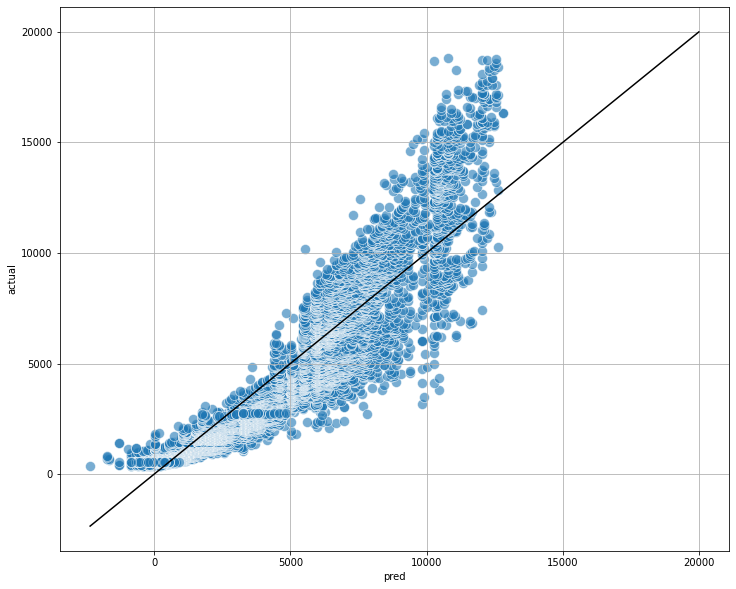

In [11]:
plt.figure(figsize=(12,10))
sns.scatterplot(pred, y, s=100, alpha=0.6)
plt.plot([pred.min(),20000],[pred.min(),20000],'k-')
plt.grid(True)
plt.xticks([0,5000,10000,15000,20000])
plt.yticks([0,5000,10000,15000,20000])
plt.xlabel('pred')
plt.ylabel('actual')
plt.show()

In [12]:
X=diamonds.drop(['price','cut_Ideal'], axis=1)
y_log=np.log(diamonds['price'])

X=sm.add_constant(X)
lm_fit_log=sm.OLS(y_log, X).fit()
print('R square : {0:.4f}'.format(lm_fit_log.rsquared))

R square : 0.9184


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


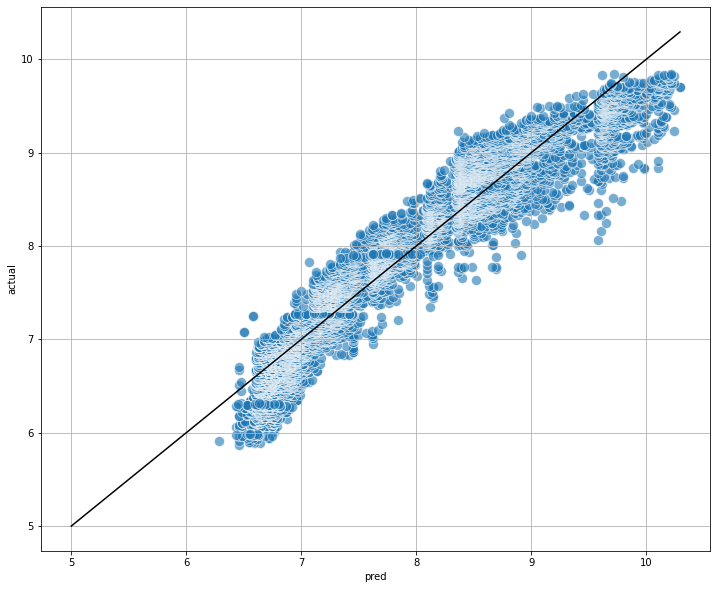

In [13]:
log_pred=lm_fit_log.predict(X)

plt.figure(figsize=(12,10))
sns.scatterplot(log_pred, y_log, s=100, alpha=0.6)
plt.plot([5,log_pred.max()],[5,log_pred.max()],'k-')
plt.grid(True)
plt.xticks([5,6,7,8,9,10])
plt.yticks([5,6,7,8,9,10])
plt.xlabel('pred')
plt.ylabel('actual')
plt.show()

## 1. Construct a network

In [14]:
X=diamonds.drop(['cut_Ideal','price'], axis=1).values
Y_actual=diamonds['price'].values

print('X shape : ',X.shape)
print('Y shape : ',Y_actual.shape)

X shape :  (10969, 5)
Y shape :  (10969,)


In [22]:
from keras import models
from keras import layers

dense_fit=models.Sequential()
dense_fit.add(layers.Dense(units=16, activation='relu', input_shape=(X.shape[1],)))
dense_fit.add(layers.Dense(units=16, activation='relu'))
dense_fit.add(layers.Dense(units=1, activation='linear'))
dense_fit.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


## 2. Compile and Fit

In [23]:
dense_fit.compile(loss='mse',
                optimizer='adam')
history=dense_fit.fit(X, Y_actual, epochs=30, batch_size=16)

Epoch 1/30
686/686 [==============================] - 1s 938us/step - loss: 26457990.3581
Epoch 2/30
686/686 [==============================] - 1s 972us/step - loss: 16709063.3392
Epoch 3/30
686/686 [==============================] - 1s 990us/step - loss: 8770242.1594
Epoch 4/30
686/686 [==============================] - 1s 950us/step - loss: 8171539.7489
Epoch 5/30
686/686 [==============================] - 1s 956us/step - loss: 6664275.4662
Epoch 6/30
686/686 [==============================] - 1s 1ms/step - loss: 5513414.4119
Epoch 7/30
686/686 [==============================] - 1s 990us/step - loss: 4437320.4403
Epoch 8/30
686/686 [==============================] - 1s 962us/step - loss: 3409611.6164
Epoch 9/30
686/686 [==============================] - 1s 997us/step - loss: 2446337.1184
Epoch 10/30
686/686 [==============================] - 1s 974us/step - loss: 2015726.9196
Epoch 11/30
686/686 [==============================] - 1s 977us/step - loss: 1796490.2740
Epoch 12/30
686/686

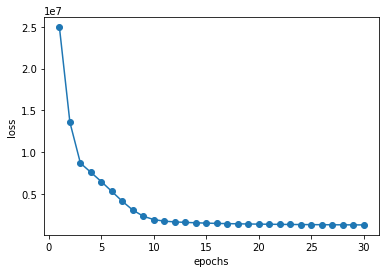

In [24]:
loss=history.history['loss']
epoch_count=np.arange(1,31)

plt.plot(epoch_count,loss,marker='o')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## 3. Predict

In [25]:
Y_pred=dense_fit.predict(X).reshape(-1)

results=pd.DataFrame({'Y_pred':Y_pred, 'price':Y_actual})
results.head()

,Y_pred,price
0,372.055878,354
1,197.201004,404
2,393.547394,553
3,583.622864,553
4,726.474487,553


In [26]:
r_squared=results.corr()**2
r_squared

,Y_pred,price
Y_pred,1.000000,0.902013
price,0.902013,1.000000


<Figure size 864x720 with 0 Axes>

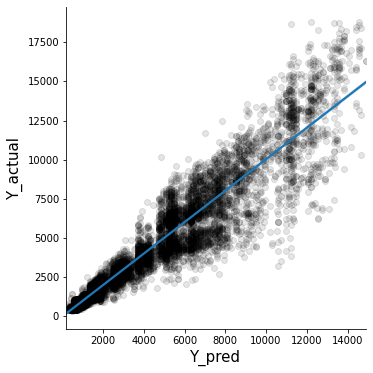

In [20]:
plt.figure(figsize=(12,10))

sns.lmplot(data=results, x='Y_pred', y='price',scatter_kws={'alpha':0.1, 'color':'black'})
plt.xlabel('Y_pred', fontsize=15)
plt.ylabel('Y_actual', fontsize=15)
plt.show()